## Observations and Insights

## Dependencies and starter code

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os
import csv
import numpy as np

# Study data files

mouse = "data_Mouse_metadata.csv"
mouse_df = pd.read_csv(mouse)

print(mouse_df.shape)

# Read the mouse data and the study results  -below via shape and head

# Combine the data into a single dataset

(249, 5)


## Summary statistics

In [50]:
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [51]:
study = "data_Study_results.csv"
studysumm_df = pd.read_csv(study)

print(studysumm_df.shape)

(1893, 4)


In [52]:
studysumm_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [53]:
# Combine the data into a single dataset
mouse_summ_df = pd.merge(mouse_df, studysumm_df, on=["Mouse ID"])
mouse_summ_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
byreg2_df = mouse_summ_df.groupby(['Drug Regimen'])
byreg2_df["Tumor Volume (mm3)"].mean().head(10)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_tumor_vol = mouse_summ_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
byregimen_tumor_vol_mean = regimen_tumor_vol.mean()
byregimen_tumor_vol_medi = regimen_tumor_vol.median()
byregimen_tumor_vol_sdev = regimen_tumor_vol.std()
byregimen_tumor_vol_sem = regimen_tumor_vol.sem()


summary_reg_df = pd.DataFrame({"Mean Tumor Volume": byregimen_tumor_vol_mean,
                            "Median Tumor Volume": byregimen_tumor_vol_medi,
                               "Standard Dev. Tumor Volume":byregimen_tumor_vol_sdev,
                               "SEM Tumor Volume":byregimen_tumor_vol_sem})

most_effective_df = summary_reg_df.sort_values(by= "SEM Tumor Volume",ascending = True)

most_effective_df.head(10)


                                 

,Mean Tumor Volume,Median Tumor Volume,Standard Dev. Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,
Ramicane,40.216745,40.673236,4.846308,0.320955
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Propriva,52.322552,50.854632,6.507770,0.512884
Zoniferol,53.236507,51.818479,6.966589,0.516398
Stelasyn,54.233149,52.431737,7.710419,0.573111
Placebo,54.033581,52.288934,7.821003,0.581331
Naftisol,54.331565,52.509285,8.134708,0.596466


## Bar plots

In [56]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#count of regimins
unique_regimen = mouse_summ_df["Drug Regimen"].unique()
print(len(unique_regimen))



10


In [57]:
#counting by regimen
byreg_ct = mouse_summ_df["Drug Regimen"].value_counts()
regimen_ct_df = byreg_ct.to_frame()


In [58]:
regimen_ct_df

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,161


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

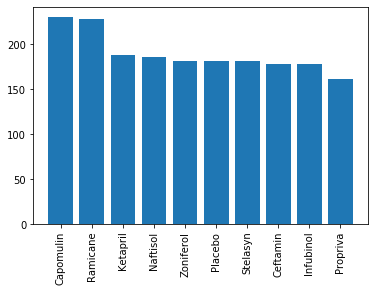

In [59]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#byreg_ct.index.values,byreg_ct.values
plt.bar(byreg_ct.index.values,byreg_ct.values)
plt.xticks(rotation = 90)






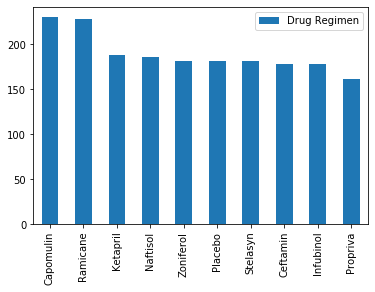

In [60]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_ct_df.plot.bar()


## Pie plots

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
bysex_ct = mouse_summ_df["Sex"].value_counts()
bysex_ct_df = bysex_ct.to_frame()
bysex_ct_df.head()






,Sex
Male,958
Female,935


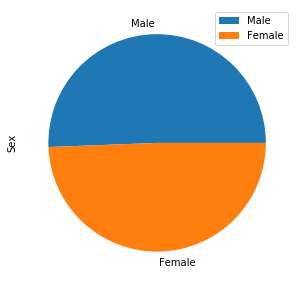

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
bysex_ct_df.plot.pie(y='Sex', figsize=(5, 5))



## Quartiles, outliers and boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
studysumm_df.head()
studysumm_df.describe()



,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [64]:
mouse_drugMAX_df = mouse_summ_df.groupby(['Mouse ID',"Drug Regimen"])["Timepoint"].max()

mouse_drugMAX_df.head()



Mouse ID  Drug Regimen
a203      Infubinol       45
a251      Infubinol       45
a262      Placebo         45
a275      Ceftamin        45
a366      Stelasyn        30
Name: Timepoint, dtype: int64

In [65]:
mouse_drugMIN_df = mouse_summ_df.groupby(['Mouse ID',"Drug Regimen"])["Timepoint"].min()

mouse_drugMIN_df.head()

Mouse ID  Drug Regimen
a203      Infubinol       0
a251      Infubinol       0
a262      Placebo         0
a275      Ceftamin        0
a366      Stelasyn        0
Name: Timepoint, dtype: int64

In [66]:
# find top 4 most effective treatments

top_drugs = list(most_effective_df.nsmallest(4,"SEM Tumor Volume").index)
top_drugs


['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

In [67]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
Ramicane = (mouse_summ_df["Drug Regimen"] == top_drugs[0])
Capomulin = (mouse_summ_df["Drug Regimen"] == top_drugs[1])
Ceftamin = (mouse_summ_df["Drug Regimen"] == top_drugs[2])
Infubinol = (mouse_summ_df["Drug Regimen"] == top_drugs[3])

top_drugs_df= mouse_summ_df.loc[(Ramicane | Capomulin | Ceftamin | Infubinol), :]
mouse_drug = top_drugs_df.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"]
final_tumor_vol = mouse_drug.last()
final_tumor_vol_df = pd.DataFrame(final_tumor_vol)
final_tumor_vol_df = final_tumor_vol_df.reset_index()
final_tumor_vol_df


,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [68]:
c_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
r_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
ce_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
i_df = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]

In [69]:
c_quartiles = c_df.quantile([.25,.5,.75])
lowerq = c_quartiles[0.25]
upperq = c_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

20.70456164999999
51.83201549


In [70]:
r_quartiles = r_df.quantile([.25,.5,.75])
lowerq = r_quartiles[0.25]
upperq = r_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

17.912664470000003
54.30681135


In [71]:
i_quartiles = i_df.quantile([.25,.5,.75])
lowerq = i_quartiles[0.25]
upperq = i_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

36.83290494999999
82.74144559000001


In [72]:
ce_quartiles = ce_df.quantile([.25,.5,.75])
lowerq = i_quartiles[0.25]
upperq = i_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

36.83290494999999
82.74144559000001


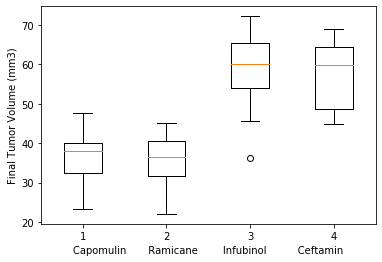

In [94]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment 
#regimens and highlight any potential outliers in the plot by changing their color and style.

plt.boxplot([c_df, r_df, i_df, ce_df],)
plt.xlabel("Capomulin       Ramicane        Infubinol          Ceftamin")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()



In [74]:
mouse_summ_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Line and scatter plots

In [75]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [76]:
Capomulin_df = mouse_summ_df.loc[mouse_summ_df["Drug Regimen"] == top_drugs[1]]
Capomulin_df.head(5)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [77]:
capmouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
capmouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


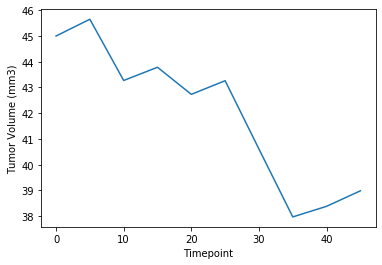

In [95]:
plt.plot(capmouse_df['Timepoint'], capmouse_df['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [79]:
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens
#and highlight any potential outliers in the plot by changing their color and style.
#All four box plots should be within the same figure. 
#Use this Matplotlib documentation page for help with changing the style of the outliers.


In [80]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
mouse_scatter = Capomulin_df
mouse_scatter
#plt.scatter(mouse_scatter['Weight (g)'], mouse_scatter['Tumor Volume (mm3)'])
#plt.show()
#plt.xlabel("Weight (g)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.show()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


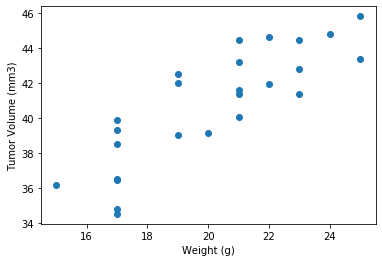

In [82]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
capu_df = mouse_summ_df.loc[mouse_summ_df["Drug Regimen"]=="Capomulin"]
capu_avg = capu_df.groupby(["Mouse ID"]).mean()

plt.scatter(capu_avg['Weight (g)'], capu_avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

rvalue    = 0.842
r-squared = 0.709


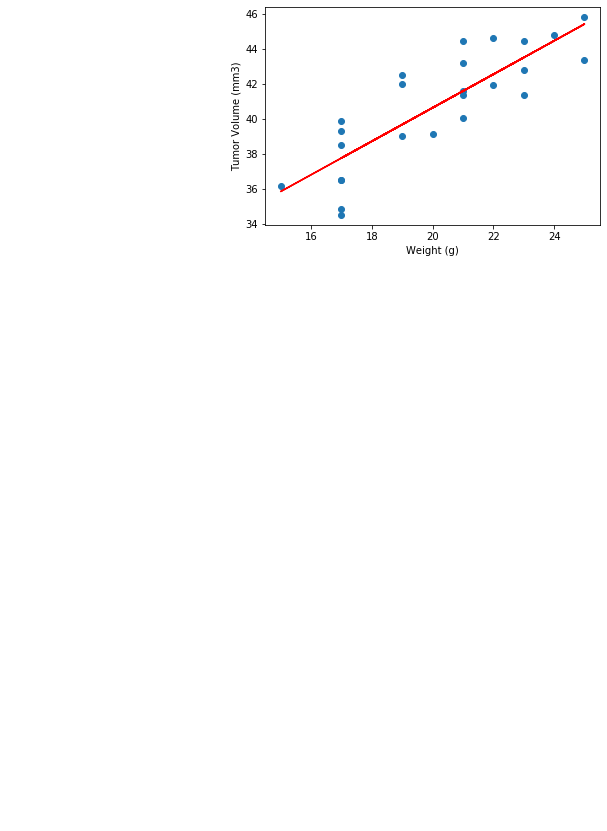

In [84]:
# Add the linear regression equation and line to plot
# And print out the r-squared value along with the plot.
# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
x_values = capu_avg['Weight (g)']
y_values = capu_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(capu_avg['Weight (g)'], capu_avg['Tumor Volume (mm3)'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel("Tumor Volume (mm3)")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()